# Overview

Objective: Determine what drives success (as defined by visits, which is assumed to be revenue) in DC.

Yelp (visits, reviews, positivity), Instagram/FB (brand awareness), news coverage

## Yelp Insights

We seek to know what visitors at restaurants have to say about well-performing wine bars. What causes a positive experience? Who is visiting? What drives out-of-town visits? In-town visits? How are restaurant reviews trending over time? Do repeat customers exist? Where do Yelp wine bar connoseurs go? (How can we attract the right ones?)

![chart](https://data.world/api/chart/export/8b8dc69a0da693c4a134dd80d49c4851cf1b37a81753825815ae70e8b974038d.png)

tl;dr: Barcelona is killing it

In [119]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob, Word
% matplotlib inline

In [2]:
wine = pd.read_csv('https://query.data.world/s/A2CYWTYyqnma6Y7iFOOKXDuKwZreZz')

In [3]:
wine.head()

,rest_name,username,review,stars,date,location
0,La Jambe,/user_details?userid=GBjdziANdkk29jjwOBj5ow,This review is massively overdue (I don't writ...,5,8/25/2017,"Washington, DC"
1,La Jambe,/user_details?userid=X3Ki2Z6JTn9gbuz23NO3kg,My friends and I were looking for a good happy...,4,9/25/2017,"Washington, DC"
2,La Jambe,/user_details?userid=dOYJX2FBw5FXDBwXZZoq7A,Elegant and intimate - La Jambe has an unexpec...,4,8/11/2017,"Washington, DC"
3,La Jambe,/user_details?userid=ZaJ6zPDAc7YaDTE2QEBGPA,This place is really special. If your in the a...,5,7/23/2017,"Red Bank, NJ"
4,La Jambe,/user_details?userid=mz8Q8yEOkgjaISIqzUSHLg,Hooray for happy hour! $5 for delicious wines?...,4,7/10/2017,"Washington, DC"


# Repeat users analysis

In [4]:
wine.shape

(4934, 6)

In [5]:
# what percent of reviews are by repeat users?
(1 - float(wine.username.nunique()) / wine.shape[0])*100

16.396432914471013

In [6]:
# how many restaraunts
wine.rest_name.nunique()

19

In [7]:
# get repeat people
repeats = wine.username.duplicated()

In [8]:
repeats

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
4904    False
4905     True
4906     True
4907    False
4908    False
4909    False
4910    False
4911     True
4912    False
4913    False
4914     True
4915    False
4916    False
4917     True
4918     True
4919    False
4920    False
4921    False
4922     True
4923    False
4924    False
4925    False
4926    False
4927    False
4928    False
4929    False
4930    False
4931    False
4932    False
4933     True
Name: username, dtype: bool

In [10]:
# get reviews from unique people
wine[repeats]

,rest_name,username,review,stars,date,location
68,La Jambe,/user_details?userid=-9YZc25iHMluMxf949822Q,This place is a delight. Wonderful charcuterie...,5,6/30/2016,"Washington, DC"
108,ENO Wine Bar,/user_details?userid=UrkD6iinGp26KvsWi8c7pQ,The flights of wine are a unique idea and they...,3,1/15/2014,"Arlington, VA"
127,ENO Wine Bar,/user_details?userid=UrkD6iinGp26KvsWi8c7pQ,Honestly one of the best places I've been to i...,5,11/18/2013,"Alameda, CA"
140,Bin 1301 Wine Bar,/user_details?userid=KiyPUvmz2HDmZvP8yiiuxw,We came here on a rainy day that also happened...,4,5/9/2017,"Washington, DC"
189,La Jambe,/user_details?userid=GBjdziANdkk29jjwOBj5ow,My friends and I were looking for a good happy...,4,9/25/2017,"Washington, DC"
190,La Jambe,/user_details?userid=X3Ki2Z6JTn9gbuz23NO3kg,Elegant and intimate - La Jambe has an unexpec...,4,8/11/2017,"Washington, DC"
191,La Jambe,/user_details?userid=dOYJX2FBw5FXDBwXZZoq7A,This place is really special. If your in the a...,5,7/23/2017,"Red Bank, NJ"
192,La Jambe,/user_details?userid=ZaJ6zPDAc7YaDTE2QEBGPA,Hooray for happy hour! $5 for delicious wines?...,4,7/10/2017,"Washington, DC"
193,La Jambe,/user_details?userid=mz8Q8yEOkgjaISIqzUSHLg,$5 happy hour wines at the corner gem La Jambe...,4,6/5/2017,"Washington, DC"
194,La Jambe,/user_details?userid=B1U0NiIcCltvuBXd8NbtuQ,This little gem is a fantastic place for happy...,5,6/23/2017,"Berkeley, CA"


In [11]:
# do the above in one line
wine[wine.username.duplicated()]

,rest_name,username,review,stars,date,location
68,La Jambe,/user_details?userid=-9YZc25iHMluMxf949822Q,This place is a delight. Wonderful charcuterie...,5,6/30/2016,"Washington, DC"
108,ENO Wine Bar,/user_details?userid=UrkD6iinGp26KvsWi8c7pQ,The flights of wine are a unique idea and they...,3,1/15/2014,"Arlington, VA"
127,ENO Wine Bar,/user_details?userid=UrkD6iinGp26KvsWi8c7pQ,Honestly one of the best places I've been to i...,5,11/18/2013,"Alameda, CA"
140,Bin 1301 Wine Bar,/user_details?userid=KiyPUvmz2HDmZvP8yiiuxw,We came here on a rainy day that also happened...,4,5/9/2017,"Washington, DC"
189,La Jambe,/user_details?userid=GBjdziANdkk29jjwOBj5ow,My friends and I were looking for a good happy...,4,9/25/2017,"Washington, DC"
190,La Jambe,/user_details?userid=X3Ki2Z6JTn9gbuz23NO3kg,Elegant and intimate - La Jambe has an unexpec...,4,8/11/2017,"Washington, DC"
191,La Jambe,/user_details?userid=dOYJX2FBw5FXDBwXZZoq7A,This place is really special. If your in the a...,5,7/23/2017,"Red Bank, NJ"
192,La Jambe,/user_details?userid=ZaJ6zPDAc7YaDTE2QEBGPA,Hooray for happy hour! $5 for delicious wines?...,4,7/10/2017,"Washington, DC"
193,La Jambe,/user_details?userid=mz8Q8yEOkgjaISIqzUSHLg,$5 happy hour wines at the corner gem La Jambe...,4,6/5/2017,"Washington, DC"
194,La Jambe,/user_details?userid=B1U0NiIcCltvuBXd8NbtuQ,This little gem is a fantastic place for happy...,5,6/23/2017,"Berkeley, CA"


In [12]:
wine[wine.username.duplicated()].shape

(809, 6)

In [13]:
wine[wine.username.duplicated()].stars.mean()

3.776266996291718

In [14]:
wine.stars.mean()

3.8603567085528985

In [15]:
wine['repeat'] = wine.username.duplicated()

In [16]:
wine[wine.repeat == False].stars.mean()

3.8768484848484848

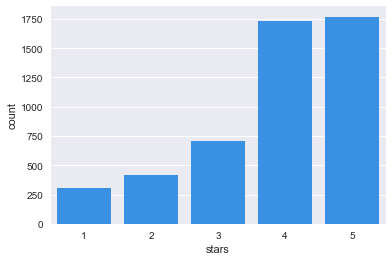

In [17]:
#all stars distribution
# all colors: https://matplotlib.org/_images/named_colors.png
sns.countplot(wine['stars'], color='dodgerblue')

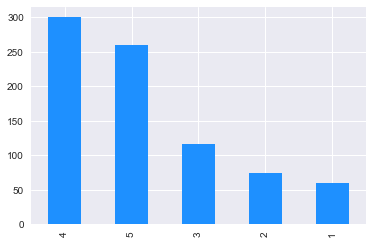

In [23]:
wine[wine.repeat == True].stars.value_counts().plot(kind='bar', color='dodgerblue')

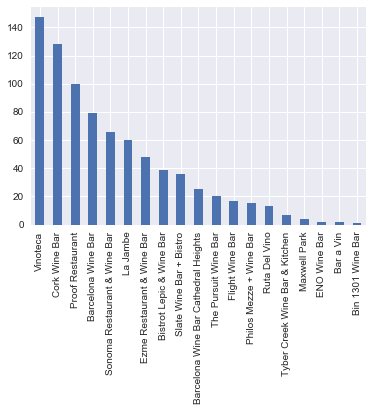

In [24]:
# most repetitively visited restaurants by repeat Yelp customers
wine[wine.repeat == True].rest_name.value_counts().plot(kind='bar')

### A/B test : Do repeat users have statistically signficant lower ratings?

# Out of town vs in town

In [25]:
wine.location.value_counts()

Washington, DC                       1885
Arlington, VA                         297
Alexandria, VA                        159
New York, NY                          116
San Francisco, CA                      98
Silver Spring, MD                      89
Fairfax, VA                            73
Bethesda, MD                           61
Baltimore, MD                          60
Chicago, IL                            58
Los Angeles, CA                        55
Washington D.C., DC                    54
Falls Church, VA                       51
Rockville, MD                          46
Brooklyn, NY                           45
Manhattan, NY                          45
San Diego, CA                          36
Seattle, WA                            31
Philadelphia, PA                       29
Vienna, VA                             26
McLean, VA                             24
Boston, MA                             24
Portland, OR                           22
Austin, TX                        

In [26]:
# define inside / outside beltway
DMV = (wine.location == "Washington, DC") | (wine.location == "Arlington, VA") | (wine.location == "Alexandria, VA") | (wine.location == "Silver Spring, MD") | (wine.location == "Washington D.C., DC") | (wine.location == "Fairfax, VA") | (wine.location == "Falls Church, VA") | (wine.location == "Bethesda, MD")


In [27]:
wine[DMV].shape

(2669, 7)

In [28]:
# what percent is in the DMV?
float(wine[DMV].shape[0]) / wine.shape[0]*100

54.09404134576409

In [29]:
wine['dmv'] = DMV

In [30]:
wine[wine.dmv == True].stars.mean()

3.8220307231172725

In [31]:
wine[wine.dmv == False].stars.mean()

3.9055187637969095

In [32]:
# percent of visits by those in the dmv
wine[wine.dmv == True].rest_name.value_counts()/wine.shape[0]

Barcelona Wine Bar                      0.117754
Proof Restaurant                        0.078435
Vinoteca                                0.078233
Cork Wine Bar                           0.049453
Sonoma Restaurant & Wine Bar            0.039522
Ezme Restaurant & Wine Bar              0.024524
Flight Wine Bar                         0.020876
Barcelona Wine Bar Cathedral Heights    0.020065
Bistrot Lepic & Wine Bar                0.020065
La Jambe                                0.019660
Slate Wine Bar + Bistro                 0.017430
The Pursuit Wine Bar                    0.015403
Ruta Del Vino                           0.010134
Philos Mezze + Wine Bar                 0.006891
Tyber Creek Wine Bar & Kitchen          0.006486
ENO Wine Bar                            0.005675
Bin 1301 Wine Bar                       0.005270
Bar a Vin                               0.002635
Maxwell Park                            0.002432
Name: rest_name, dtype: float64

In [33]:
# percent of visits by those not in the DMV
wine[wine.dmv == False].rest_name.value_counts()/wine.shape[0]

Barcelona Wine Bar                      0.101135
Proof Restaurant                        0.091812
Vinoteca                                0.055533
Sonoma Restaurant & Wine Bar            0.037495
Ezme Restaurant & Wine Bar              0.036279
Cork Wine Bar                           0.035671
Flight Wine Bar                         0.017633
Bistrot Lepic & Wine Bar                0.016417
Slate Wine Bar + Bistro                 0.013174
Barcelona Wine Bar Cathedral Heights    0.012363
The Pursuit Wine Bar                    0.008918
Bin 1301 Wine Bar                       0.006891
La Jambe                                0.006486
ENO Wine Bar                            0.006283
Philos Mezze + Wine Bar                 0.005270
Ruta Del Vino                           0.003243
Tyber Creek Wine Bar & Kitchen          0.001621
Maxwell Park                            0.001419
Bar a Vin                               0.001419
Name: rest_name, dtype: float64

In [34]:
# bump by out of towners?
wine[wine.dmv == False].rest_name.value_counts()/wine.shape[0] - wine[wine.dmv == True].rest_name.value_counts()/wine.shape[0]

Bar a Vin                              -0.001216
Barcelona Wine Bar                     -0.016619
Barcelona Wine Bar Cathedral Heights   -0.007702
Bin 1301 Wine Bar                       0.001621
Bistrot Lepic & Wine Bar               -0.003648
Cork Wine Bar                          -0.013782
ENO Wine Bar                            0.000608
Ezme Restaurant & Wine Bar              0.011755
Flight Wine Bar                        -0.003243
La Jambe                               -0.013174
Maxwell Park                           -0.001013
Philos Mezze + Wine Bar                -0.001621
Proof Restaurant                        0.013377
Ruta Del Vino                          -0.006891
Slate Wine Bar + Bistro                -0.004256
Sonoma Restaurant & Wine Bar           -0.002027
The Pursuit Wine Bar                   -0.006486
Tyber Creek Wine Bar & Kitchen         -0.004864
Vinoteca                               -0.022700
Name: rest_name, dtype: float64

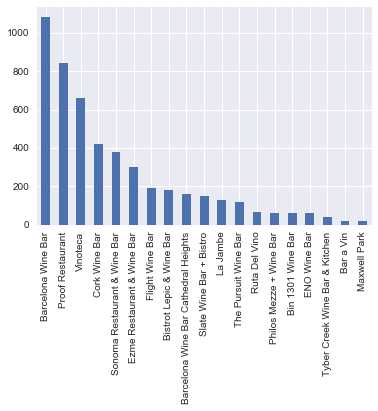

In [35]:
wine.rest_name.value_counts().plot(kind='bar')

### A/B Test: Are out of towners nicer than those in the DMV?

# Restaurant trends over time

In [36]:
wine.dtypes 

rest_name    object
username     object
review       object
stars         int64
date         object
location     object
repeat         bool
dmv            bool
dtype: object

In [37]:
wine.describe()

,stars
count,4934.000000
mean,3.860357
std,1.174324
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [38]:
wine.describe(include=['object']) 

,rest_name,username,review,date,location
count,4934,4934,4934,4934,4934
unique,19,4125,4874,2430,735
top,Barcelona Wine Bar,/user_details?userid=A4HjuMo-QgWxsCxXiV5i0A,i had heard that La Jambe had opened right by ...,6/4/2017,"Washington, DC"
freq,1080,54,2,10,1885


In [39]:
wine.describe(include='all')

,rest_name,username,review,stars,date,location,repeat,dmv
count,4934,4934,4934,4934.000000,4934,4934,4934,4934
unique,19,4125,4874,NaN,2430,735,2,2
top,Barcelona Wine Bar,/user_details?userid=A4HjuMo-QgWxsCxXiV5i0A,i had heard that La Jambe had opened right by ...,NaN,6/4/2017,"Washington, DC",False,True
freq,1080,54,2,NaN,10,1885,4125,2669
mean,NaN,NaN,NaN,3.860357,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.174324,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [40]:
wine.describe(include=['object'])

,rest_name,username,review,date,location
count,4934,4934,4934,4934,4934
unique,19,4125,4874,2430,735
top,Barcelona Wine Bar,/user_details?userid=A4HjuMo-QgWxsCxXiV5i0A,i had heard that La Jambe had opened right by ...,6/4/2017,"Washington, DC"
freq,1080,54,2,10,1885


In [41]:
wine[wine.username == '/user_details?userid=A4HjuMo-QgWxsCxXiV5i0A']

,rest_name,username,review,stars,date,location,repeat,dmv
458,Barcelona Wine Bar,/user_details?userid=A4HjuMo-QgWxsCxXiV5i0A,"Best service, best food, best place in DC, sim...",5,9/21/2017,"Germantown, MD",False,False
478,Barcelona Wine Bar,/user_details?userid=A4HjuMo-QgWxsCxXiV5i0A,"This place was, Perfection! We went with anoth...",5,9/10/2017,"Carmel, IN",True,False
498,Barcelona Wine Bar,/user_details?userid=A4HjuMo-QgWxsCxXiV5i0A,"Outstanding. Superlative in service, varied an...",5,7/13/2017,"Omaha, NE",True,False
518,Barcelona Wine Bar,/user_details?userid=A4HjuMo-QgWxsCxXiV5i0A,"Food, service, and atmosphere were all fantast...",5,7/18/2017,"Manhattan, New York, NY",True,False
538,Barcelona Wine Bar,/user_details?userid=A4HjuMo-QgWxsCxXiV5i0A,Came to visit a friend up who lives in DC and ...,5,11/22/2016,"Miami, FL",True,False
558,Barcelona Wine Bar,/user_details?userid=A4HjuMo-QgWxsCxXiV5i0A,What a mess! We waited in a cramped hallway f...,1,3/10/2017,"Reston, VA",True,False
578,Barcelona Wine Bar,/user_details?userid=A4HjuMo-QgWxsCxXiV5i0A,"I love wine bars and tapas, so coming here for...",5,3/12/2017,"Potomac Falls, VA",True,False
598,Barcelona Wine Bar,/user_details?userid=A4HjuMo-QgWxsCxXiV5i0A,We did not have the best experience here and I...,2,6/12/2017,"Midtown, Memphis, TN",True,False
618,Barcelona Wine Bar,/user_details?userid=A4HjuMo-QgWxsCxXiV5i0A,This place had been on my list for a while and...,5,10/17/2016,"Evanston, IL",True,False
638,Barcelona Wine Bar,/user_details?userid=A4HjuMo-QgWxsCxXiV5i0A,Yum tapas in a nice setting. This spot is alon...,4,1/20/2016,"Las Vegas, NV",True,False


In [85]:
wine2 = wine
df = pd.DataFrame(wine2)

In [ ]:
#df.index.get_level_values('review').get_duplicates()
#df['review'].duplicated()
###didn't work
df.index.get_level_values('review').get_duplicates()

In [123]:
review1 = wine2["review"]

In [124]:
#also not working
review1[review1.isin(review1[review1.duplicated()])].sort("review")

C:\Users\Pedro\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  if __name__ == '__main__':


In [87]:
young_bool = wine.stars < 2        # create a Series of booleans...
print young_bool

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
4904    False
4905    False
4906    False
4907    False
4908    False
4909    False
4910    False
4911    False
4912    False
4913     True
4914    False
4915    False
4916    False
4917    False
4918    False
4919    False
4920    False
4921    False
4922    False
4923    False
4924    False
4925    False
4926    False
4927    False
4928    False
4929    False
4930    False
4931    False
4932    False
4933    False
Name: stars, dtype: bool


In [88]:
type(young_bool)

pandas.core.series.Series

In [89]:
#Printing only 1 star reviews to see what people are talking about.
wine[young_bool] 

,rest_name,username,review,stars,date,location
45,La Jambe,/user_details?userid=5jbBEpPRPOpOMJe22BrZnA,This place is atrocious. It has nothing good ...,1,8/15/2016,"Washington, DC"
50,La Jambe,/user_details?userid=aCOdjvsKh0BbCv_qslHZEQ,Both me and my friend were charged higher tips...,1,10/14/2016,"Washington, DC"
70,ENO Wine Bar,/user_details?userid=2qH3A7LkhNRGD4hzFnJ0IQ,Visited a while back and found this un-posted ...,1,8/8/2015,"South Park, Charlotte, NC"
74,ENO Wine Bar,/user_details?userid=o2YkmLspg1FR3cR9uuG2RQ,Could of gotten a better rating but the waiter...,1,3/10/2015,"Washington, DC"
77,ENO Wine Bar,/user_details?userid=RLaRN39XKDFKDBydLqs9UQ,AWFUL. \r\n\r\nWe really wanted to like this p...,1,2/22/2014,"Washington D.C., DC"
106,ENO Wine Bar,/user_details?userid=95kgY9hxqwpjC1NaCZJP5g,They insisted that a $50 bottle of wine was wo...,1,10/25/2014,"Washington, DC"
118,ENO Wine Bar,/user_details?userid=5ighn4wLB9jPbd0lYqsHBA,Called ahead to find a table outside. I wish I...,1,5/24/2014,"Knightdale, NC"
124,ENO Wine Bar,/user_details?userid=E0HaR8LYMR31MojFJk9YnQ,Eno needs to invest in better staff. I have b...,1,2/13/2015,"Washington, DC"
233,La Jambe,/user_details?userid=CZcPYNG6JeaFB48XD07tUw,This place is atrocious. It has nothing good ...,1,8/15/2016,"Washington, DC"
238,La Jambe,/user_details?userid=MvbMTcPdyiWF6ocWzQNskQ,Both me and my friend were charged higher tips...,1,10/14/2016,"Washington, DC"


In [91]:
Star1 = wine[young_bool]
star1_df = pd.DataFrame(Star1)

In [93]:
#created a separate file to evaluate 1 star review
star1_df.to_csv('star1-summary.csv')

In [95]:
Star1.describe()

,stars
count,307.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [96]:
star3 = wine.stars       # create a Series of booleans...
print young_bool

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
4904    False
4905    False
4906    False
4907    False
4908    False
4909    False
4910    False
4911    False
4912    False
4913     True
4914    False
4915    False
4916    False
4917    False
4918    False
4919    False
4920    False
4921    False
4922    False
4923    False
4924    False
4925    False
4926    False
4927    False
4928    False
4929    False
4930    False
4931    False
4932    False
4933    False
Name: stars, dtype: bool


In [98]:
type(star3)

pandas.core.series.Series

In [99]:
wine[star3] 

,rest_name,username,review,stars,date,location
8,La Jambe,/user_details?userid=XuYkUMWvzcUQa8TOuPbtAQ,Asked the owner's husband for a recommendation...,2,8/17/2017,"Washington D.C., DC"
19,La Jambe,/user_details?userid=0du6Wws_dwkeUyRIO_fEeg,"I usually love La Jambe, their happy hour is e...",2,8/4/2017,"Washington, DC"
33,La Jambe,/user_details?userid=T8JHqx00YtRc6-KyPVjw8A,The wine card was nice but the platters of che...,2,8/4/2017,"Washington, DC"
45,La Jambe,/user_details?userid=5jbBEpPRPOpOMJe22BrZnA,This place is atrocious. It has nothing good ...,1,8/15/2016,"Washington, DC"
48,La Jambe,/user_details?userid=93p_hrmtmC_fpwbEhdo8TA,The food is insultingly abysmal and especially...,2,2/17/2017,"Washington, DC"
50,La Jambe,/user_details?userid=aCOdjvsKh0BbCv_qslHZEQ,Both me and my friend were charged higher tips...,1,10/14/2016,"Washington, DC"
70,ENO Wine Bar,/user_details?userid=2qH3A7LkhNRGD4hzFnJ0IQ,Visited a while back and found this un-posted ...,1,8/8/2015,"South Park, Charlotte, NC"
74,ENO Wine Bar,/user_details?userid=o2YkmLspg1FR3cR9uuG2RQ,Could of gotten a better rating but the waiter...,1,3/10/2015,"Washington, DC"
77,ENO Wine Bar,/user_details?userid=RLaRN39XKDFKDBydLqs9UQ,AWFUL. \r\n\r\nWe really wanted to like this p...,1,2/22/2014,"Washington D.C., DC"
79,ENO Wine Bar,/user_details?userid=bW_e9iem-w3z7Ow68zRlCQ,"Their wine list is expansive, their small plat...",2,2/22/2015,"McLean, VA"


In [116]:
wine[(wine.stars < 2) & (wine.location=='Arlington, VA')]       # ampersand for AND condition

,rest_name,username,review,stars,date,location
879,Barcelona Wine Bar,/user_details?userid=_W9Oe1sJjW0RZ22OzGJ3ow,Quite possibly the worst run restaurant I have...,1,1/29/2017,"Arlington, VA"
887,Barcelona Wine Bar,/user_details?userid=OCDmQNP5BA4KEMPp0lvgWA,This evening at Barcelona was an unmitigated d...,1,10/17/2015,"Arlington, VA"
1038,Barcelona Wine Bar,/user_details?userid=A4HjuMo-QgWxsCxXiV5i0A,We called Barcelona this afternoon to see if w...,1,7/30/2016,"Arlington, VA"
1317,Barcelona Wine Bar,/user_details?userid=-n6B1M_lgdPU7p1itCVang,Only two of us and our first time here. Terrib...,1,7/6/2014,"Arlington, VA"
1347,Barcelona Wine Bar,/user_details?userid=PFmr21q7tgmq8yVgQqJMMA,The consistency of Barcelona's offerings has d...,1,7/11/2015,"Arlington, VA"
1406,Barcelona Wine Bar,/user_details?userid=gAlI8OzLQn4YAiO7Ip_ViQ,Three of us had a reservation for 9:00 on Satu...,1,12/20/2015,"Arlington, VA"
1701,Proof Restaurant,/user_details?userid=FTORp4ROa1bkpeiLXMo_5g,Horrible Service. I went to proof with two oth...,1,7/27/2016,"Arlington, VA"
1831,Proof Restaurant,/user_details?userid=A_OETe5Xr26FTNRPkRQ4zw,Be very careful ordering wine by the glass. T...,1,11/19/2014,"Arlington, VA"
2834,The Pursuit Wine Bar,/user_details?userid=9dsF6Y501zn8kkPc0lhnew,WORST SERVICE EVER. Obviously regular custome...,1,5/24/2015,"Arlington, VA"
2964,Vinoteca,/user_details?userid=EMFSvNlNC82dHVxh8Cx6BA,My friend had her birthday here in the outdoor...,1,3/27/2016,"Arlington, VA"


In [118]:
# users[(users.age < 20) | (users.age > 60)] 
wine[(wine.stars > 4 ) | (wine.location=='San Francisco, CA')] 

,rest_name,username,review,stars,date,location
0,La Jambe,/user_details?userid=GBjdziANdkk29jjwOBj5ow,This review is massively overdue (I don't writ...,5,8/25/2017,"Washington, DC"
3,La Jambe,/user_details?userid=ZaJ6zPDAc7YaDTE2QEBGPA,This place is really special. If your in the a...,5,7/23/2017,"Red Bank, NJ"
6,La Jambe,/user_details?userid=W7R6U1ibcHxXBYedVWYQqw,This little gem is a fantastic place for happy...,5,6/23/2017,"Berkeley, CA"
7,La Jambe,/user_details?userid=oe0t5jdk-WHCYqnkRB_reg,Best wine bar happy hour in the Shaw area! A f...,5,12/30/2016,"Washington, DC"
14,La Jambe,/user_details?userid=LtZJ_YZN9eRrFe0N4m8SsA,FYI they are closed on Mondays (found that out...,5,7/19/2017,"Charlotte, NC"
15,La Jambe,/user_details?userid=fyxvvMyF4mIIdigAnuhvaQ,"Cute, clam, affordable wine happy hour. The pl...",5,7/13/2017,"Washington, DC"
16,La Jambe,/user_details?userid=KiyPUvmz2HDmZvP8yiiuxw,Another win in the series of 7th St Shaw bars....,5,5/8/2017,"Washington, DC"
17,La Jambe,/user_details?userid=wklmU8CM7czQQBuhOC4k9A,Love this place. Top shelf staff who were aut...,5,5/27/2017,"Chicago, IL"
20,La Jambe,/user_details?userid=uEWsWCNKTTaQ0dTT-mft8Q,"Best wine bar in DC, amazing wines, delicious ...",5,9/10/2017,"Washington, DC"
23,La Jambe,/user_details?userid=E-UoJyyrhaGGk_aU0r1ulQ,Loved this place! Perfect for a Francophile li...,5,7/12/2017,"Washington, DC"


In [122]:
#organizing a column
##users.sort_values(by='age')
wine.sort_values(by='date', ascending='False')

,rest_name,username,review,stars,date,location
3508,Vinoteca,/user_details?userid=aHrKRzRI-97jVvkdUbVcQw,"I hate to write this review of Vinoteca, which...",1,1/1/2011,"Washington, DC"
3037,Vinoteca,/user_details?userid=PV8CVP4HVR2PLOGyE4h9jQ,My sister decided to take me here. It almost ...,5,1/1/2011,"Tracy, CA"
1456,Barcelona Wine Bar,/user_details?userid=YAqsOlhiFYCnn4xHGY7i8A,Loved it! We went to dinner at a place a few d...,5,1/1/2014,"Rockville, MD"
93,ENO Wine Bar,/user_details?userid=s8MItoeBfg9UB8hFv4Y-3A,A very chic and comfortable place in Georgetow...,4,1/1/2015,"Arlington, VA"
799,Barcelona Wine Bar,/user_details?userid=K5snFjHCzAJoM2jtyQIKnw,"First things first, be prepared for a very, ve...",4,1/1/2015,"Owings, MD"
3716,Cork Wine Bar,/user_details?userid=f1Bl93jWro06HRXwXPt8_w,Really enjoyed this as an after dinner venue. ...,4,1/1/2016,"Fairbanks, AK"
2707,Sonoma Restaurant & Wine Bar,/user_details?userid=rDGP_7fAjzZjKeqAIoq_4A,The Burgers here are out of this world! They u...,4,1/10/2009,"New York, NY"
2721,Sonoma Restaurant & Wine Bar,/user_details?userid=mQJj6PzlTzJt1GfiSTdXDQ,I ate at Sonoma for the second time this weeke...,4,1/10/2010,"Washington, DC"
1497,Barcelona Wine Bar,/user_details?userid=plrwVWYOr_ZH8TC5ZjMq7A,"AMAZING, AMAZING, AMAZING.\r\n\r\nThis is a mu...",5,1/10/2014,"Washington, DC"
120,ENO Wine Bar,/user_details?userid=M3sRd37pIRK-ZqTehh_XQg,I was invited to dine here by a friend who fre...,4,1/10/2014,"Arlington, VA"


In [128]:
nltk.download('treebank')

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\Pedro\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

[("Best wine bar happy hour in the Shaw area! A few friends and I went here for Happy Hour on a Thursday night. \r\n\r\nATMOSPHERE: Went here with a group of friends for happy hour on a Thursday night. It wasn't too crowded so we were able to get a large table. There's also a long marble bar that you can sit at. Soft lighting, cute tea plates that your grandmother owns, and vases with flowers all over the place. Very cute, would recommend for a date or a girls' night! \r\n\r\nWINE: Four options for happy hour, each were between $5-6. Sparkling, rose, white and red. Very good wines for the price. We tried the Pinot Noir which was delicious. They also have beer if you're not a wine drinker. \r\n\r\nFOOD: We ordered the La Suprise (under Plateaux Mixtes) which is a selection of cheeses and charcuterie that they have for the day. The large size ($51) was enough to feed 6 people. 2 cheeses, 2 meats, blackberry preserve and apricot jam, dried apricots, and 2 bread/water cracker baskets. Had 

' [U+d]
  MathTextWarning)
C:\Users\Pedro\Anaconda2\lib\site-packages\matplotlib\mathtext.py:867: MathTextWarning: Substituting with a dummy symbol.
  warn("Substituting with a dummy symbol.", MathTextWarning)


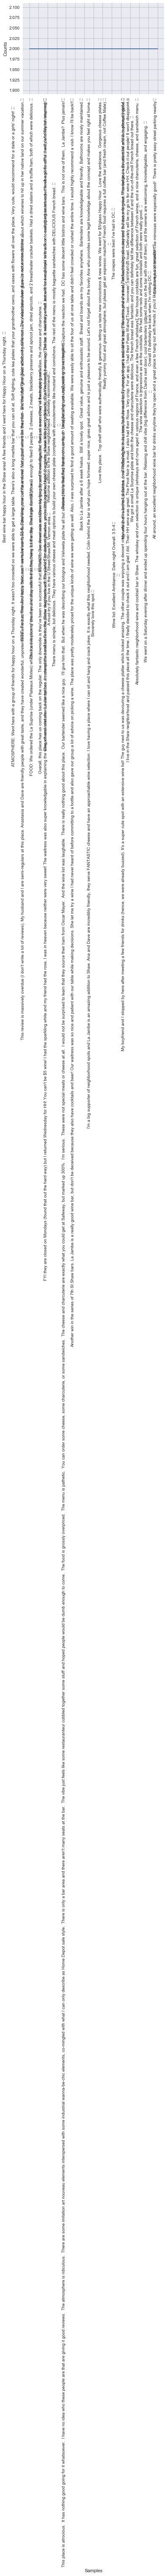

In [131]:
from nltk import FreqDist
fd=FreqDist(wine.review)
print fd.most_common(10) #sorts them for you
fd.plot(15)

# Restaurant Review Value over Time

In [42]:
wine.head()

,rest_name,username,review,stars,date,location,repeat,dmv
0,La Jambe,/user_details?userid=GBjdziANdkk29jjwOBj5ow,This review is massively overdue (I don't writ...,5,8/25/2017,"Washington, DC",False,True
1,La Jambe,/user_details?userid=X3Ki2Z6JTn9gbuz23NO3kg,My friends and I were looking for a good happy...,4,9/25/2017,"Washington, DC",False,True
2,La Jambe,/user_details?userid=dOYJX2FBw5FXDBwXZZoq7A,Elegant and intimate - La Jambe has an unexpec...,4,8/11/2017,"Washington, DC",False,True
3,La Jambe,/user_details?userid=ZaJ6zPDAc7YaDTE2QEBGPA,This place is really special. If your in the a...,5,7/23/2017,"Red Bank, NJ",False,False
4,La Jambe,/user_details?userid=mz8Q8yEOkgjaISIqzUSHLg,Hooray for happy hour! $5 for delicious wines?...,4,7/10/2017,"Washington, DC",False,True


In [43]:
wine.dtypes

rest_name    object
username     object
review       object
stars         int64
date         object
location     object
repeat         bool
dmv            bool
dtype: object

In [44]:
ts = wine.set_index('date')

In [45]:
ts.head()

,rest_name,username,review,stars,location,repeat,dmv
date,,,,,,,
8/25/2017,La Jambe,/user_details?userid=GBjdziANdkk29jjwOBj5ow,This review is massively overdue (I don't writ...,5,"Washington, DC",False,True
9/25/2017,La Jambe,/user_details?userid=X3Ki2Z6JTn9gbuz23NO3kg,My friends and I were looking for a good happy...,4,"Washington, DC",False,True
8/11/2017,La Jambe,/user_details?userid=dOYJX2FBw5FXDBwXZZoq7A,Elegant and intimate - La Jambe has an unexpec...,4,"Washington, DC",False,True
7/23/2017,La Jambe,/user_details?userid=ZaJ6zPDAc7YaDTE2QEBGPA,This place is really special. If your in the a...,5,"Red Bank, NJ",False,False
7/10/2017,La Jambe,/user_details?userid=mz8Q8yEOkgjaISIqzUSHLg,Hooray for happy hour! $5 for delicious wines?...,4,"Washington, DC",False,True


In [46]:
ts.index = pd.to_datetime(ts.index)

In [47]:
ts.head()

,rest_name,username,review,stars,location,repeat,dmv
date,,,,,,,
2017-08-25,La Jambe,/user_details?userid=GBjdziANdkk29jjwOBj5ow,This review is massively overdue (I don't writ...,5,"Washington, DC",False,True
2017-09-25,La Jambe,/user_details?userid=X3Ki2Z6JTn9gbuz23NO3kg,My friends and I were looking for a good happy...,4,"Washington, DC",False,True
2017-08-11,La Jambe,/user_details?userid=dOYJX2FBw5FXDBwXZZoq7A,Elegant and intimate - La Jambe has an unexpec...,4,"Washington, DC",False,True
2017-07-23,La Jambe,/user_details?userid=ZaJ6zPDAc7YaDTE2QEBGPA,This place is really special. If your in the a...,5,"Red Bank, NJ",False,False
2017-07-10,La Jambe,/user_details?userid=mz8Q8yEOkgjaISIqzUSHLg,Hooray for happy hour! $5 for delicious wines?...,4,"Washington, DC",False,True


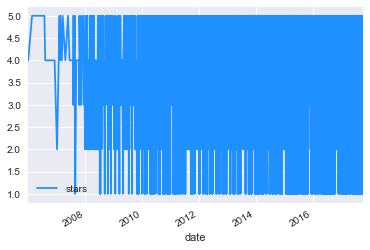

In [48]:
ts.plot(x=ts.index, y = 'stars', color='dodgerblue')

In [49]:
ts['date'] = ts.index

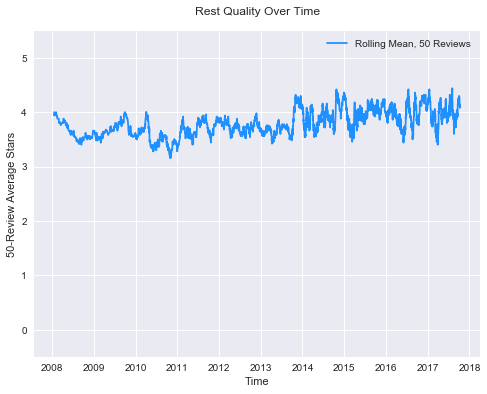

In [50]:
fig = plt.figure(figsize=(8, 6))
plt.plot(ts.sort_values(by='date').stars.rolling(window=50,center=False).mean(), label='Rolling Mean, 50 Reviews', color='dodgerblue')
plt.legend(loc='best')
plt.ylim(-0.5, 5.5)
plt.title('Rest Quality Over Time', y=1.03)
plt.ylabel('50-Review Average Stars')
plt.xlabel('Time')

In [51]:
ts.sort_values(by='date')[ts.sort_values(by='date').rest_name == 'Vinoteca'].stars

date
2007-12-30    3
2008-01-05    2
2008-01-06    4
2008-01-17    2
2008-02-12    2
2008-02-13    4
2008-02-17    3
2008-04-10    5
2008-04-13    4
2008-04-18    4
2008-05-18    4
2008-05-22    2
2008-05-26    2
2008-06-05    4
2008-06-17    2
2008-06-19    4
2008-06-24    4
2008-06-25    3
2008-06-30    3
2008-07-01    3
2008-07-02    3
2008-07-25    3
2008-08-31    4
2008-09-01    3
2008-09-23    4
2008-10-19    4
2008-10-20    5
2008-10-22    1
2008-10-27    4
2008-10-28    5
             ..
2017-02-21    4
2017-02-23    3
2017-03-05    3
2017-03-12    3
2017-04-10    4
2017-04-13    3
2017-04-23    2
2017-04-29    5
2017-05-01    2
2017-05-12    2
2017-05-26    3
2017-05-30    4
2017-06-08    4
2017-06-12    5
2017-06-17    1
2017-06-18    2
2017-06-22    4
2017-06-28    4
2017-07-14    2
2017-07-19    5
2017-07-20    4
2017-08-05    2
2017-08-18    1
2017-08-26    4
2017-09-02    1
2017-09-09    2
2017-09-19    3
2017-09-27    1
2017-10-08    3
2017-10-08    3
Name: stars, dtype:

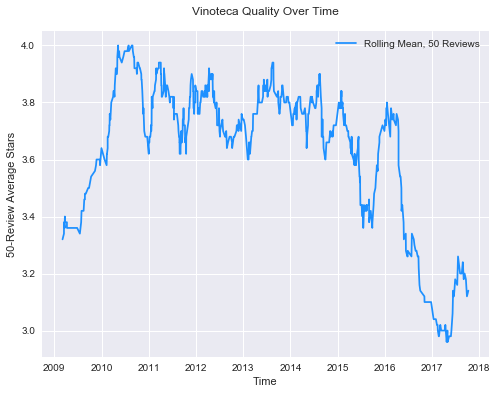

In [52]:
# vinoteca performance over time
fig = plt.figure(figsize=(8, 6))
plt.plot(ts.sort_values(by='date')[ts.sort_values(by='date').rest_name == 'Vinoteca'].stars.rolling(window=50,center=False).mean(), label='Rolling Mean, 50 Reviews', color='dodgerblue')
plt.legend(loc='best')
plt.title('Vinoteca Quality Over Time', y=1.03)
plt.ylabel('50-Review Average Stars')
plt.xlabel('Time')

In [53]:
# vinoteca performance over time
def plot_rest_quality(rest_name, n_reviews):
    fig = plt.figure(figsize=(8, 6))
    plt.plot(ts.sort_values(by='date')[ts.sort_values(by='date').rest_name == rest_name].stars.rolling(window=n_reviews,center=False).mean(), label='Rolling Mean %d Reviews' %n_reviews, color='dodgerblue')
    plt.ylim(-0.5,5.5)
    plt.legend(loc='best')
    plt.title('%s Quality Over Time'%rest_name, y=1.03)
    plt.ylabel('%d -Review Average Stars'%n_reviews)
    plt.xlabel('Time')

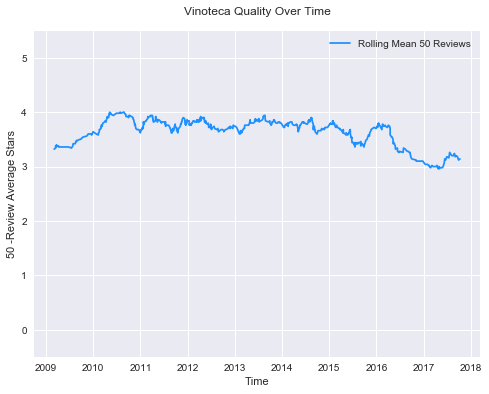

In [131]:
plot_rest_quality('Vinoteca', 50)

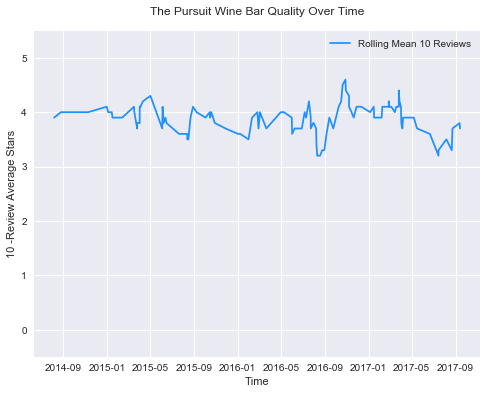

In [54]:
plot_rest_quality('The Pursuit Wine Bar', 10)

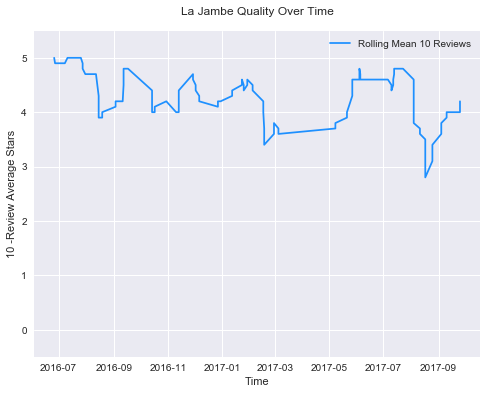

In [55]:
plot_rest_quality('La Jambe', 10)

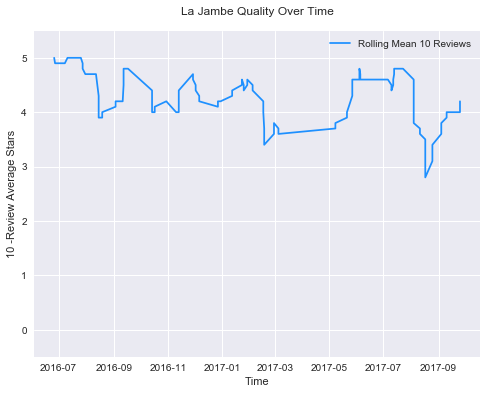

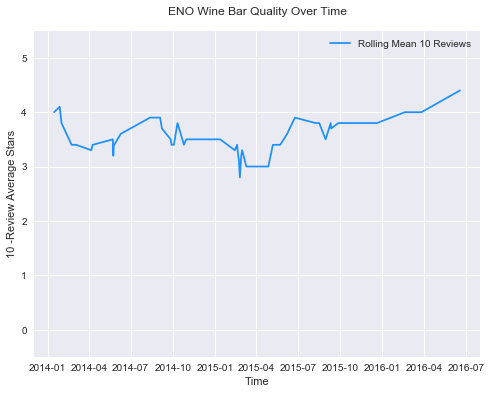

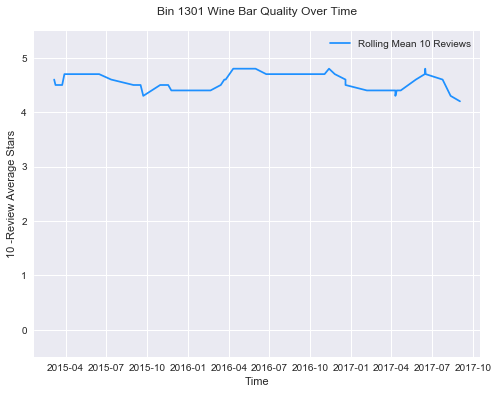

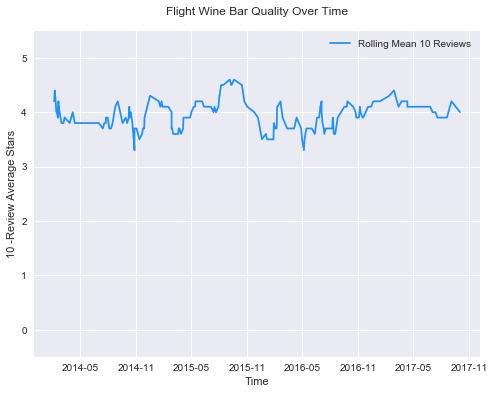

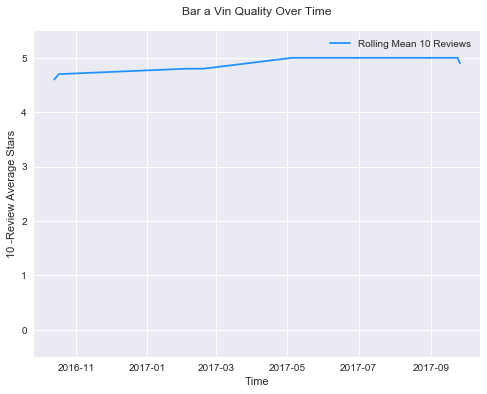

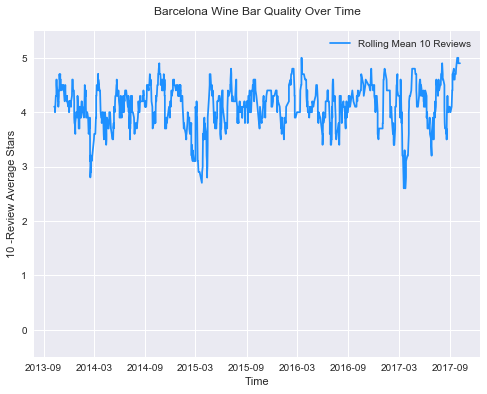

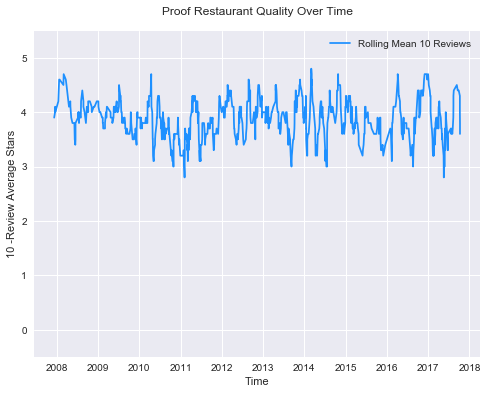

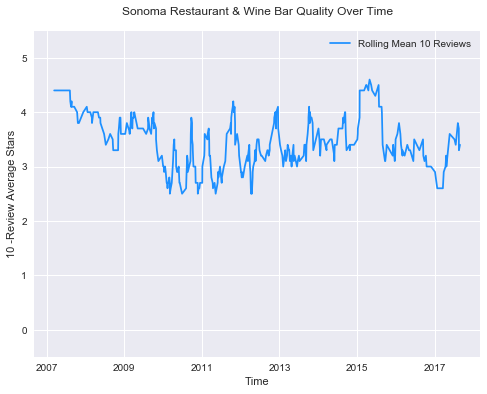

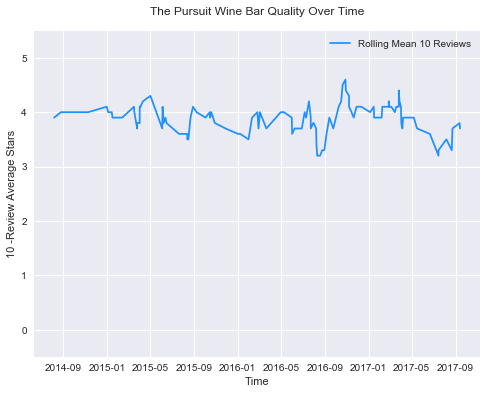

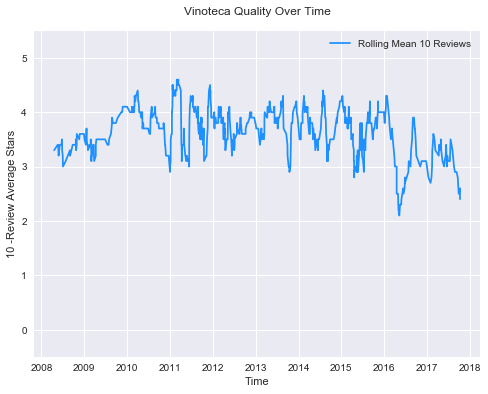

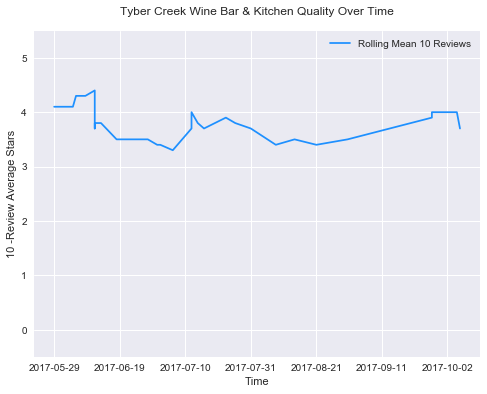

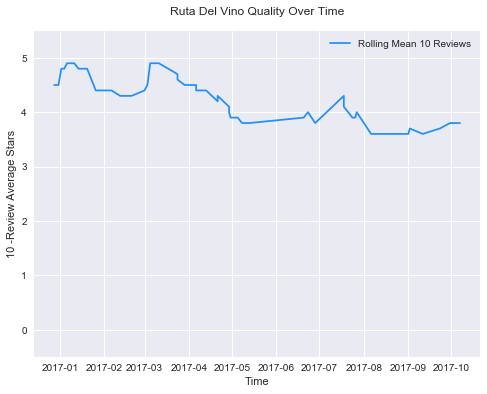

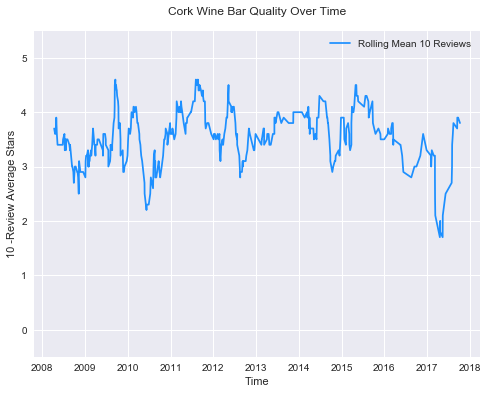

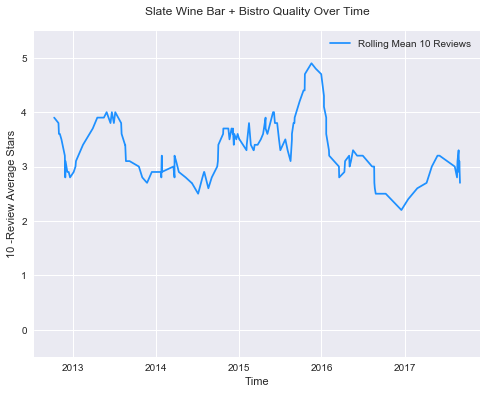

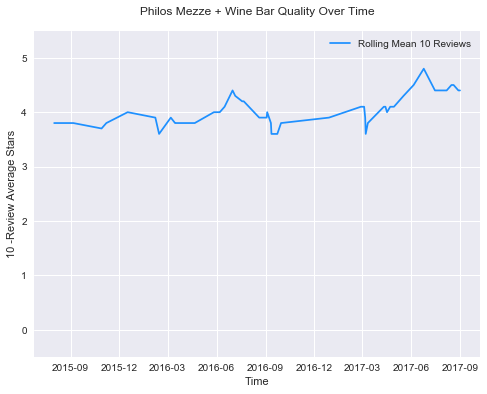

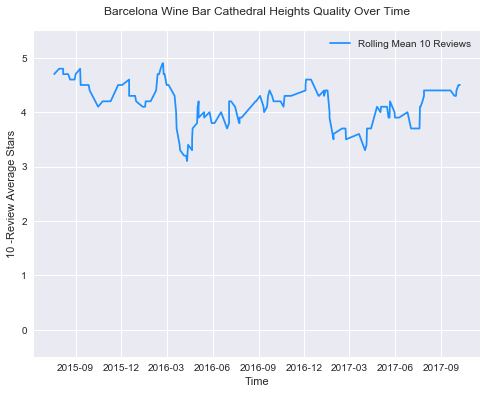

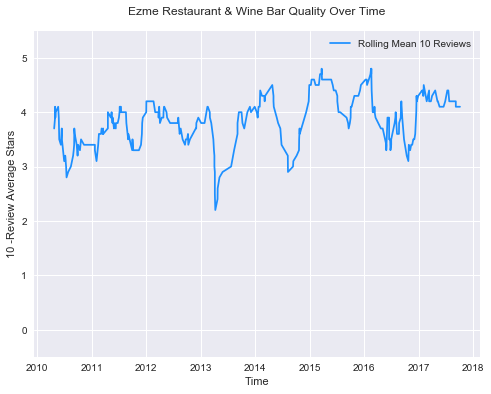

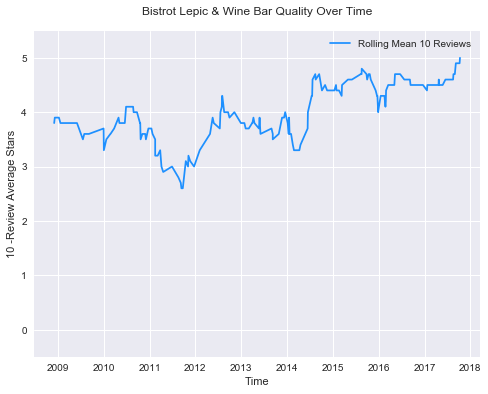

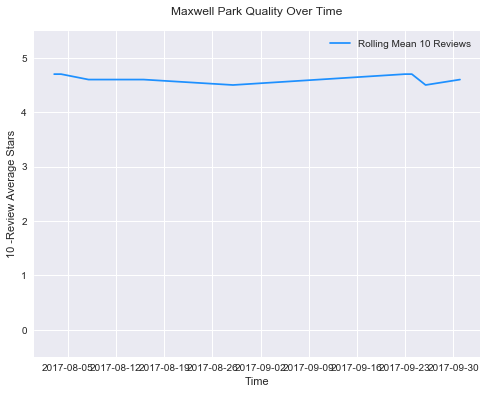

In [57]:
for restaurant in wine.rest_name.unique():
    plot_rest_quality(restaurant, 10)

We want to know:
- Volume of reviews during each of these times
- When restaurants have dips or upticks, why?

In [ ]:
# predict what causes good / bad reviews!
# predict 4 star and above reviews 
# predict "good" and "bad" reviews for a given restaurant (predict if a given review is above/below the average for that given restaurant)


###Text Processing

In [58]:
text = wine.review

In [59]:
print(text[0:5])

0    This review is massively overdue (I don't writ...
1    My friends and I were looking for a good happy...
2    Elegant and intimate - La Jambe has an unexpec...
3    This place is really special. If your in the a...
4    Hooray for happy hour! $5 for delicious wines?...
Name: review, dtype: object


In [61]:
# investigate single entry
text[0]

"This review is massively overdue (I don't write a lot of reviews). My husband and I are semi-regulars at this place. Anastasia and Dave are friendly people with great taste, and they have created wonderful, unpretentious wine bar. The wine list is delicious - we have our favorites like everyone but have never had a bad wine from their list - and the staff give great advice if you're not sure. Anastasia even gave us recommendations about which wineries to hit up in her native land on our summer vacation.\r\n\r\nThe food is yummy too, if you're okay with the dishes being a bit on the small side for the price.\r\n\r\nOverall, this place has us coming back on the regular. The only downside is they've been so successful that it's rarer to see Anastasia and Dave hanging around these days, but that just means they've been doing well. \r\n\r\nA must-try if you live in the U Street/Shaw/Mt. Vernon area.\r\n"

In [62]:
# eliminate encoding like 
# StackOverflow decoding function iwth light edits http://stackoverflow.com/questions/27996448/python-encoding-decoding-problems
def unicodetoascii(text):

    uni2ascii = {
            ord('\xe2\x80\x99'.decode('utf-8')): ord("'"),
            ord('\xe2\x80\x9c'.decode('utf-8')): ord('"'),
            ord('\xe2\x80\x9d'.decode('utf-8')): ord('"'),
            ord('\xe2\x80\x9e'.decode('utf-8')): ord('"'),
            ord('\xe2\x80\x9f'.decode('utf-8')): ord('"'),
            ord('\xc3\xa9'.decode('utf-8')): ord('e'),
            ord('\xe2\x80\x9c'.decode('utf-8')): ord('"'),
            ord('\xe2\x80\x93'.decode('utf-8')): ord('-'),
            ord('\xe2\x80\x92'.decode('utf-8')): ord('-'),
            ord('\xe2\x80\x94'.decode('utf-8')): ord('-'),
            ord('\xe2\x80\x94'.decode('utf-8')): ord('-'),
            ord('\xe2\x80\x98'.decode('utf-8')): ord("'"),
            ord('\xe2\x80\x9b'.decode('utf-8')): ord("'"),

            ord('\xe2\x80\x90'.decode('utf-8')): ord('-'),
            ord('\xe2\x80\x91'.decode('utf-8')): ord('-'),

            ord('\xe2\x80\xb2'.decode('utf-8')): ord("'"),
            ord('\xe2\x80\xb3'.decode('utf-8')): ord("'"),
            ord('\xe2\x80\xb4'.decode('utf-8')): ord("'"),
            ord('\xe2\x80\xb5'.decode('utf-8')): ord("'"),
            ord('\xe2\x80\xb6'.decode('utf-8')): ord("'"),
            ord('\xe2\x80\xb7'.decode('utf-8')): ord("'"),

            ord('\xe2\x81\xba'.decode('utf-8')): ord("+"),
            ord('\xe2\x81\xbb'.decode('utf-8')): ord("-"),
            ord('\xe2\x81\xbc'.decode('utf-8')): ord("="),
            ord('\xe2\x81\xbd'.decode('utf-8')): ord("("),
            ord('\xe2\x81\xbe'.decode('utf-8')): ord(")"),

                            }
    try:
        return text.decode('utf-8').translate(uni2ascii).encode('ascii')
    except:
        return text

In [63]:
# check it
print(unicodetoascii(text[0]))

This review is massively overdue (I don't write a lot of reviews). My husband and I are semi-regulars at this place. Anastasia and Dave are friendly people with great taste, and they have created wonderful, unpretentious wine bar. The wine list is delicious - we have our favorites like everyone but have never had a bad wine from their list - and the staff give great advice if you're not sure. Anastasia even gave us recommendations about which wineries to hit up in her native land on our summer vacation.

The food is yummy too, if you're okay with the dishes being a bit on the small side for the price.

Overall, this place has us coming back on the regular. The only downside is they've been so successful that it's rarer to see Anastasia and Dave hanging around these days, but that just means they've been doing well. 

A must-try if you live in the U Street/Shaw/Mt. Vernon area.



In [64]:
# apply the above to the whole dataframe
wine['review'] = wine.review.apply(unicodetoascii)

In [65]:
# export cleaner file to csv as clean file
wine.to_csv('wine_cleaned.csv')

In [66]:
wine = pd.read_csv('wine_cleaned.csv')
text = wine.review

In [69]:
'''
create a document term matrix with:
-ngram range 1,2
-minimum document appearance for any term = 2
-removal of all English stop words
'''
vect = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=2)
dtm = vect.fit_transform(text)

In [70]:
# do the above, but make a dataframe with feature names = words
tf = pd.DataFrame(vect.fit_transform(text).toarray(), columns=vect.get_feature_names())

In [71]:
# see most common terms
tf.sum().sort_values(ascending=False)

wine                  5201
food                  4116
great                 3503
good                  3494
place                 2814
service               2409
bar                   2239
really                2034
just                  2006
like                  1846
cheese                1740
time                  1646
menu                  1620
nice                  1518
restaurant            1510
ordered               1475
delicious             1396
night                 1395
table                 1362
came                  1242
dinner                1174
got                   1120
definitely            1089
ve                    1087
happy                 1081
hour                  1074
small                 1072
went                  1000
little                 981
experience             973
                      ... 
refusing                 2
frustrated fact          2
refreshing summer        2
fryer                    2
refreshing light         2
refreshing hot           2
f

In [85]:
# create first term df
wine_2016_post = wine[wine.date < '12/31/2015']

In [86]:
wine_2016_post.shape

(1404, 9)

In [87]:
# vectorize terms from first term
tf1 = pd.DataFrame(vect.fit_transform(wine_2016_post.review).toarray(), columns=vect.get_feature_names())

In [88]:
# check value counts
tf1.sum().sort_values(ascending=False)

wine                   1566
food                   1178
good                   1046
great                  1032
place                   798
service                 688
bar                     683
really                  617
just                    565
like                    535
time                    510
cheese                  493
nice                    462
restaurant              449
menu                    441
night                   435
dinner                  412
ordered                 410
delicious               396
table                   385
came                    379
got                     333
definitely              331
tapas                   314
ve                      310
don                     303
hour                    302
went                    298
experience              290
happy                   290
                       ... 
reason don                2
reason brunch             2
friend looking            2
friend happy              2
recommend coming    

In [89]:
# create second term df
wine_2016_pre = wine[wine.date > '12/31/2015']

In [90]:
wine_2016_pre.shape

(3528, 9)

In [91]:
# vectorize terms from first term
tf2 = pd.DataFrame(vect.fit_transform(wine_2016_pre.review).toarray(), columns=vect.get_feature_names())

In [92]:
# check totals
tf2.sum().sort_values(ascending=False)

wine                      3630
food                      2936
great                     2470
good                      2445
place                     2015
service                   1719
bar                       1555
just                      1439
really                    1417
like                      1311
cheese                    1247
menu                      1179
time                      1135
ordered                   1064
restaurant                1061
nice                      1054
delicious                  998
table                      977
night                      960
came                       862
happy                      791
got                        787
small                      783
ve                         777
hour                       772
dinner                     759
definitely                 757
little                     712
went                       701
glass                      693
                          ... 
gem street                   2
reservat

In [93]:
# word counts of first and second term
word_counts = pd.merge(pd.DataFrame(data=tf1.sum().sort_values(ascending=False)),pd.DataFrame(data=tf2.sum().sort_values(ascending=False)),how='outer',left_index=True,right_index=True)
print(word_counts)

                    0_x    0_y
00                 18.0   45.0
00 bottomless       NaN    2.0
00 good             NaN    2.0
00 pm               8.0    6.0
00 reservation      2.0    NaN
000                 2.0    3.0
00pm                4.0    7.0
00pm reservation    2.0    NaN
01                  2.0    NaN
08                  4.0    2.0
09                  3.0    2.0
10                 88.0  272.0
10 00               NaN    3.0
10 10               2.0    7.0
10 12               2.0    5.0
10 15               NaN    8.0
10 20               NaN    2.0
10 30               3.0   11.0
10 30pm             NaN    2.0
10 50               NaN    2.0
10 bad              NaN    2.0
10 bottomless       2.0   17.0
10 bucks            2.0    3.0
10 day              NaN    2.0
10 dishes           NaN    2.0
10 dollars          NaN    2.0
10 don              2.0    NaN
10 drink            NaN    2.0
10 end              NaN    2.0
10 food             NaN    2.0
...                 ...    ...
yummy se

In [111]:
# rename columns
word_counts.columns = ['2016_onward', '2015_prior_to'] 

In [112]:
# view the df
word_counts.head()

,2016_onward,2015_prior_to
00,18.0,45.0
00 bottomless,NaN,2.0
00 good,NaN,2.0
00 pm,8.0,6.0
00 reservation,2.0,NaN


In [114]:
# find sums
word_counts['sum'] = word_counts['2016_onward'] + word_counts['2015_prior_to'] 

In [115]:
# sort by most used values
word_counts.sort_values(['sum'], ascending=False)

,2016_onward,2015_prior_to,sum
wine,1566.0,3630.0,5196.0
food,1178.0,2936.0,4114.0
great,1032.0,2470.0,3502.0
good,1046.0,2445.0,3491.0
place,798.0,2015.0,2813.0
service,688.0,1719.0,2407.0
bar,683.0,1555.0,2238.0
really,617.0,1417.0,2034.0
just,565.0,1439.0,2004.0
like,535.0,1311.0,1846.0


In [116]:
# curiousity
word_counts.transpose()

,00,00 bottomless,00 good,00 pm,00 reservation,000,00pm,00pm reservation,01,08,...,zone,zoo,zucchini,zucchini cakes,zucchini fritter,zucchini fritters,zucchini pancake,zucchini pancakes,zuchini,zutant
2016_onward,18.0,NaN,NaN,8.0,2.0,2.0,4.0,2.0,2.0,4.0,...,3.0,NaN,15.0,NaN,2.0,4.0,NaN,6.0,2.0,NaN
2015_prior_to,45.0,2.0,2.0,6.0,NaN,3.0,7.0,NaN,NaN,2.0,...,4.0,2.0,52.0,5.0,NaN,11.0,2.0,19.0,NaN,3.0
sum,63.0,NaN,NaN,14.0,NaN,5.0,11.0,NaN,NaN,6.0,...,7.0,NaN,67.0,NaN,NaN,15.0,NaN,25.0,NaN,NaN


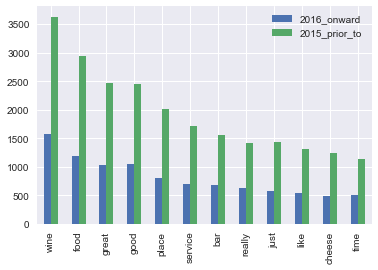

In [118]:
# plot 12 most used terms
word_counts.sort_values(['sum'], ascending=False).drop('sum', axis=1).head(12).plot(kind='bar')

Sentiment Analysis

In [120]:
# grab a story with Textblob
story = TextBlob(wine.review[0])

In [121]:
# polarity ranges from -1 (most negative) to 1 (most positive)
story.sentiment.polarity

0.2600852272727273

In [122]:
# define a function that accepts text and returns the polarity
def detect_sentiment(text):
    return TextBlob(text.decode('utf-8')).sentiment.polarity

In [123]:
wine['sentiment'] = wine.review.apply(detect_sentiment)

In [124]:
wine.sentiment.describe()

count    4934.000000
mean        0.283542
std         0.195673
min        -1.000000
25%         0.173011
50%         0.279010
75%         0.394444
max         1.000000
Name: sentiment, dtype: float64

In [ ]:
# plot sentiment
wine.groupby('stars').mean().sort_values('sentiment', ascending=False).plot(kind='bar', color='dodgerblue')
plt.xlabel('Primary Content Stars')
plt.ylabel('Average Sentiment')
plt.title('Average Yelp Sentiment by Content Tag', y=1.03)
plt.show()